In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append("../")
from helpers.iaml01cw2_helpers import load_CoVoST2


Xtrn,Ytrn,Xtst,Ytst = load_CoVoST2(sys.path[0] + "\\data")


l_names = []
l_syms = []
with open(sys.path[0] + "\\data\\languages.txt", 'r') as file:
    for line in file.readlines():
        l = line.split(" ")
        num = int(l[0])
        if num <= 9:
            l_name = l[2]
            l_sym = l[3]
        else:
            l_name = l[1]
            l_sym = l[2]
        l_names.append(l_name)
        l_syms.append(l_sym[1:-2])

In [2]:
%%time

from sklearn.cluster import KMeans

kmeans = KMeans(22, random_state = 1)
kmeans.fit(Xtrn)

C:\Users\User\anaconda3\envs\py3iaml\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Sequence


Wall time: 7.64 s


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=22, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [3]:
np.round(kmeans.inertia_, 4)

38185.817

In [4]:
list(zip(*np.unique(kmeans.labels_, return_counts = True)))

[(0, 1018),
 (1, 1125),
 (2, 1191),
 (3, 890),
 (4, 1162),
 (5, 1332),
 (6, 839),
 (7, 623),
 (8, 1400),
 (9, 838),
 (10, 659),
 (11, 1276),
 (12, 121),
 (13, 152),
 (14, 950),
 (15, 1971),
 (16, 1251),
 (17, 845),
 (18, 896),
 (19, 930),
 (20, 1065),
 (21, 1466)]

In [5]:
Xmeans = []
for c in range(22):
    Xclass = Xtrn[np.where(Ytrn == c)[0]]
    Xmeans.append(Xclass.mean(0))

Xmeans = np.array(Xmeans)
Xmeans.shape

(22, 26)

In [6]:
from sklearn.decomposition import PCA

pca_mean = PCA(2)
Xmean_pca = pca_mean.fit_transform(Xmeans)
cluster_pca = pca_mean.transform(kmeans.cluster_centers_)

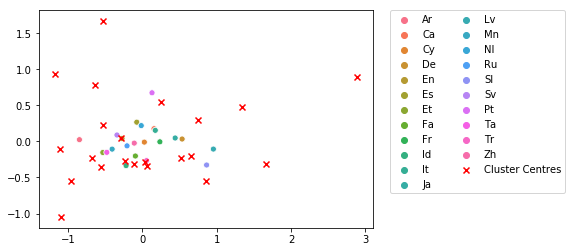

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(Xmean_pca.transpose()[0], Xmean_pca.transpose()[1], hue = l_syms)
plt.scatter(cluster_pca.transpose()[0], cluster_pca.transpose()[1], marker = "x", label = "Cluster Centres", c = 'r')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 2)

In [8]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [9]:
Z_means = linkage(Xmeans, "ward")

0

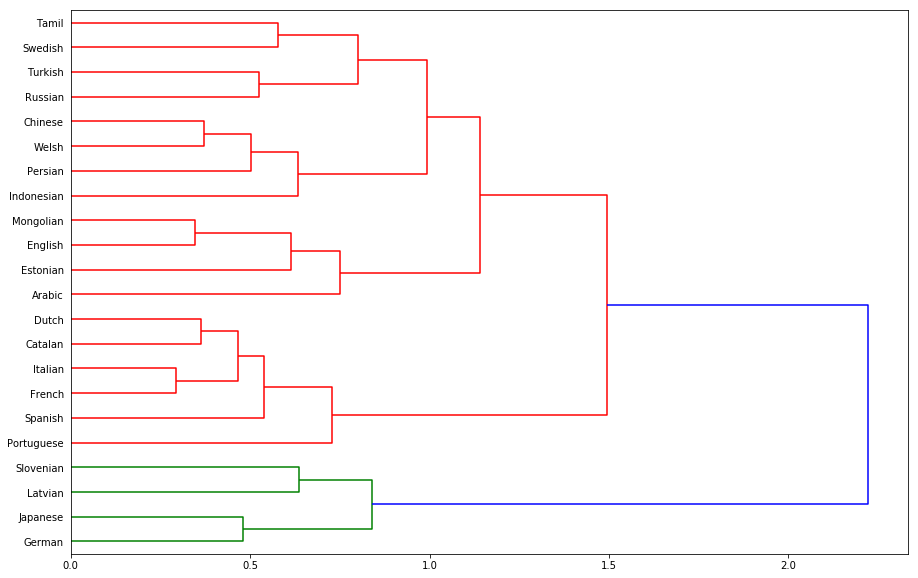

In [10]:
plt.figure(figsize = (15, 10))
dendrogram(Z_means, orientation = "right", labels = l_names)
0

In [11]:
X_clustered = []
den_labs = []

for c in range(22):
    Xclass = Xtrn[np.where(Ytrn == c)[0]]
    kmeans_c = KMeans(3, random_state = 1)
    kmeans_c.fit(Xclass)
    X_clustered.append(kmeans_c.cluster_centers_)
    
    for i in range(3):
        den_labs.append(f"{l_syms[c]} Cluster {i}")

In [12]:
X_clustered = np.concatenate(X_clustered)

0

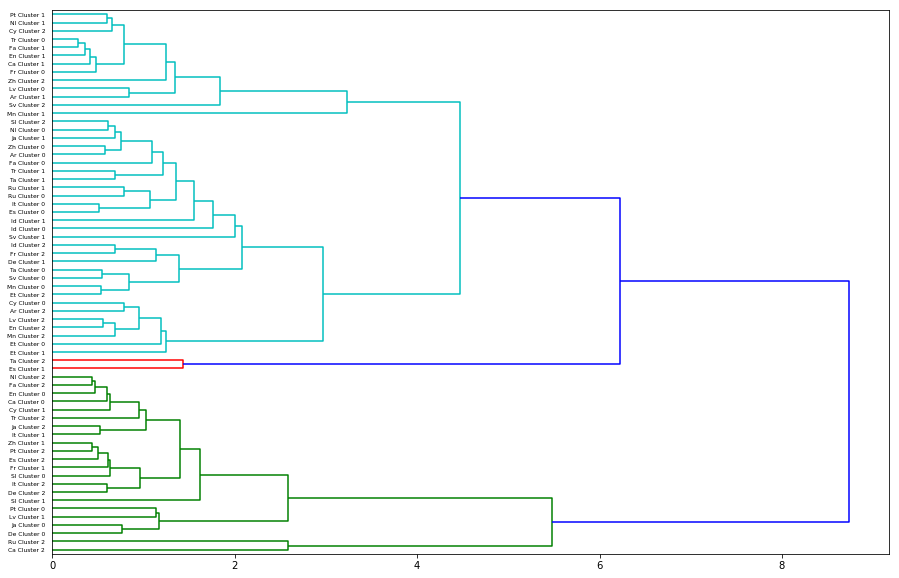

In [13]:
plt.figure(figsize = (15, 10))
Zc_ward = linkage(X_clustered, "ward")
dendrogram(Zc_ward, orientation = "right", labels = den_labs)
0

0

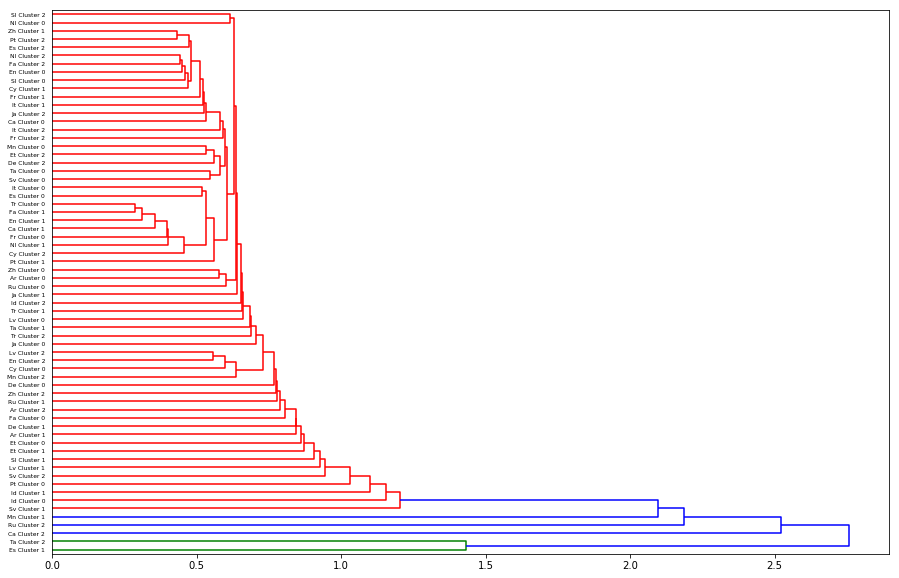

In [14]:
plt.figure(figsize = (15, 10))
Zc_ward = linkage(X_clustered, "single")
dendrogram(Zc_ward, orientation = "right", labels = den_labs)
0

0

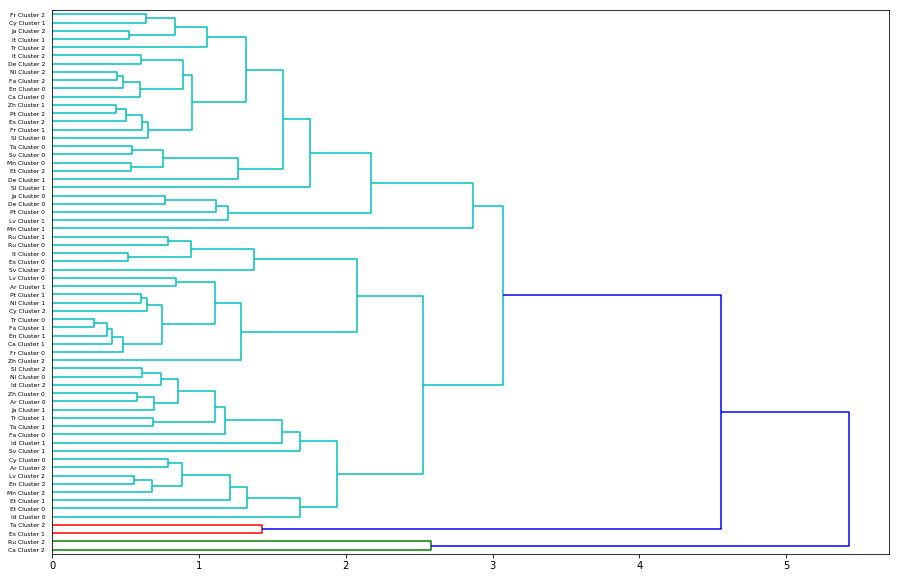

In [15]:
plt.figure(figsize = (15, 10))
Zc_ward = linkage(X_clustered, "complete")
dendrogram(Zc_ward, orientation = "right", labels = den_labs)
0

In [16]:
from sklearn.mixture import GaussianMixture

In [17]:
l0_train = Xtrn[np.where(Ytrn == 0)[0]]
l0_test = Xtst[np.where(Ytst == 0)[0]]

l0_train.shape, l0_test.shape

((1001, 26), (103, 26))

In [18]:
%%time

diag_cov = []
full_cov = []
ks = (1, 3, 5, 10, 15)

for k in ks:
    diag_model = GaussianMixture(k, covariance_type = "diag", random_state = 1)
    full_model = GaussianMixture(k, covariance_type = "full", random_state = 1)
    
    diag_model.fit(l0_train)
    full_model.fit(l0_train)
    
    diag_cov.append((diag_model.score(l0_train), diag_model.score(l0_test)))
    full_cov.append((full_model.score(l0_train), full_model.score(l0_test)))
    
diag_cov = np.array(diag_cov).transpose()
full_cov = np.array(full_cov).transpose()

Wall time: 514 ms


Text(0,0.5,'Per-sample average log-likelihood')

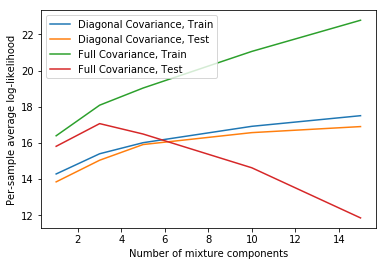

In [19]:
plt.plot(ks, diag_cov[0], label = "Diagonal Covariance, Train")
plt.plot(ks, diag_cov[1], label = "Diagonal Covariance, Test")

plt.plot(ks, full_cov[0], label = "Full Covariance, Train")
plt.plot(ks, full_cov[1], label = "Full Covariance, Test")

plt.legend()
plt.xlabel("Number of mixture components")
plt.ylabel("Per-sample average log-likelihood")

In [20]:
np.round(diag_cov, 4), np.round(full_cov, 4), 

(array([[14.2804, 15.3984, 16.0104, 16.9165, 17.5046],
        [13.8429, 15.0407, 15.9085, 16.5676, 16.9017]]),
 array([[16.3936, 18.086 , 19.0357, 21.062 , 22.786 ],
        [15.8105, 17.0661, 16.4894, 14.6218, 11.848 ]]))